In [1]:
import pandas as pd

In [14]:
rf = pd.read_parquet("../_data/tips_treasury_implied_rf.parquet")
rf

,date,real_cc2,real_cc5,real_cc10,real_cc20,nom_zc2,nom_zc5,nom_zc10,nom_zc20,tips_treas_2_rf,tips_treas_5_rf,tips_treas_10_rf,tips_treas_20_rf,arb_2,arb_5,arb_10,arb_20
0,2010-01-04,-0.000515,0.007010,0.016359,0.021538,109.505229,268.439780,428.047942,500.008760,153.039838,306.999411,451.983024,532.350304,43.534609,38.559630,23.935082,32.341544
1,2010-01-05,-0.001248,0.006286,0.015905,0.020813,101.824926,259.540905,420.521627,494.245870,141.315737,299.288270,442.961403,519.622174,39.490811,39.747365,22.439776,25.376304
2,2010-01-06,-0.001413,0.006443,0.016328,0.021353,102.875564,264.569315,428.767485,504.808368,141.220328,301.156999,448.589298,522.995516,38.344764,36.587685,19.821813,18.187148
3,2010-01-07,-0.002250,0.006208,0.015919,0.021503,104.805405,266.283644,427.808072,503.820974,135.279947,304.270766,449.478216,529.948426,30.474542,37.987122,21.670143,26.127452
4,2010-01-08,-0.002142,0.005842,0.015771,0.021135,98.996805,262.434519,426.160609,503.243297,139.807254,295.420505,449.008662,527.769585,40.810449,32.985986,22.848053,24.526288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2024-12-24,0.019212,0.020855,0.022503,0.024221,440.120171,451.945078,472.356728,497.950976,455.605814,463.373977,481.859136,496.573273,15.485643,11.428899,9.502408,-1.377703
3888,2024-12-26,0.019155,0.020751,0.022394,0.024151,438.575147,449.426463,470.817405,498.181934,453.633753,461.060676,480.236030,495.613164,15.058606,11.634213,9.418625,-2.568769
3889,2024-12-27,0.019295,0.021138,0.022898,0.024698,438.387255,452.206380,475.876031,504.031050,454.067681,464.946482,486.235616,502.278329,15.680426,12.740102,10.359584,-1.752720
3890,2024-12-30,0.018824,0.020605,0.022550,0.024555,431.489761,443.200460,467.823179,499.725280,446.200063,456.246432,478.833361,497.220339,14.710303,13.045971,11.010182,-2.504941


In [19]:
test = pd.DataFrame(index=rf.index)
test = rf[['arb_2', 'arb_5', 'arb_10', 'arb_20']]
test['date'] = rf['date']
test.index = test['date']
test.drop('date', axis=1, inplace=True)
test

/var/folders/1h/wbbvkbk549sfz9lg54w00j1m0000gn/T/ipykernel_82379/2553423616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = rf['date']
/var/folders/1h/wbbvkbk549sfz9lg54w00j1m0000gn/T/ipykernel_82379/2553423616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('date', axis=1, inplace=True)


,arb_2,arb_5,arb_10,arb_20
date,,,,
2010-01-04,43.534609,38.559630,23.935082,32.341544
2010-01-05,39.490811,39.747365,22.439776,25.376304
2010-01-06,38.344764,36.587685,19.821813,18.187148
2010-01-07,30.474542,37.987122,21.670143,26.127452
2010-01-08,40.810449,32.985986,22.848053,24.526288
...,...,...,...,...
2024-12-24,15.485643,11.428899,9.502408,-1.377703
2024-12-26,15.058606,11.634213,9.418625,-2.568769
2024-12-27,15.680426,12.740102,10.359584,-1.752720


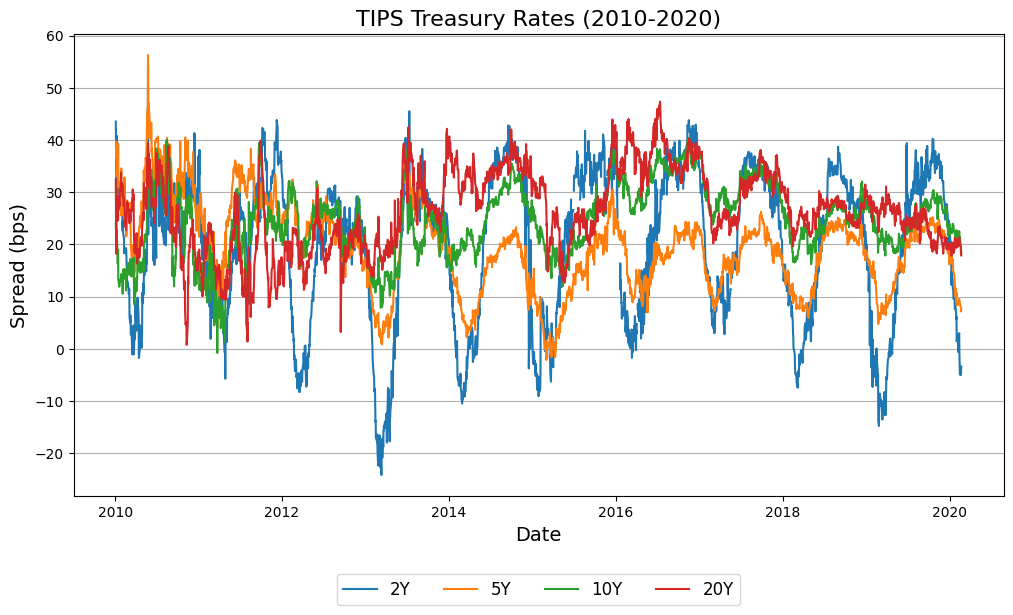

In [21]:
import matplotlib.pyplot as plt

# Create a mapping dictionary for the legend names
legend_name_map = {
    "arb_2": "2Y",
    "arb_5": "5Y",
    "arb_10": "10Y",
    "arb_20": "20Y"
}

plt.figure(figsize=(12, 6))
plt.plot(test['2010':'2020-02-20'])
plt.title('TIPS Treasury Rates (2010-2020)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Spread (bps)', fontsize=14)
plt.grid(True, axis='y')

plt.legend([legend_name_map[col] for col in test.columns], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.show()